# Aim
Choosing countries for NGO funding, which are in the direst need of aid, based on socio-economic and health factors 
that determine the overall development of the country. 


### Solution :
We will use unsupervised machine learning - "clustering" for segmenting the countries into aided and non-aided, in the above problem statement.
Clustering helps identify two qualities of data: Meaningfulness and Usefulness
We will evaluate three categories of clustering algorithms and choose the best method which gives best results:
1. Partitional clustering
 - It divides data objects into nonoverlapping groups. 
 - A datapoint must belong to only one cluster, and every cluster must have at least one object.
 - Users must predetermine the number of clusters(k). 
 - It is an iterative process, which subsets the data points into k clusters.
 - It is nondeterministic and produces different results from two separate runs even if the runs were based on the same input
 - Partitional clustering methods work well when clusters have a spherical shape. They are not well suited for clusters with complex shapes and different sizes. They break down when used with clusters of different densities.
 - Partitional clustering methods are scalable with respect to algorithm complexity.
 - For eg : k-means and k-medoids.


2. Hierarchical clustering
- It determines clusters by building a tree-based hierarchy, using either a bottom-up or a top-down approach
- The number of clusters(k) is predetermined by the user. 
- It produces a tree-based hierarchy of points called a dendrogram. The Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.
-  It is a deterministic process and cluster assignments don’t change if we run an algorithm twice on the same input data.
- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.
- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers
- For eg : 
   - Agglomerative clustering(bottom-up approach): 
       - It merges two similar points until all points have been merged into a single cluster.
   - Divisive clustering(top-down approach):
       - It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.


3. Density-based clustering
- It determines clusters based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.
- Users do not require to specify the number of clusters(k). Instead, distance-based parameters act as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.
- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.
- They aren’t well suited for clustering in high-dimensional spaces.
- They have trouble identifying clusters of varying densities.
- For eg: Density-Based Spatial Clustering of Applications with Noise(DBSCAN) and Ordering Points To Identify the Clustering Structure, or OPTICS.


#### Note : 
For our study we will evaluate all three types : 
 - Partitional clustering using k-means
 - Hierarchical clustering using Agglomerative clustering
 - Density-based clustering using DBSCAN

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

from IPython.display import display

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Read, inspect and clean data

### 1.  Load dataset from file

In [2]:

# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('Country-data.csv')

### 2. Inspect dataset

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Conclusion:
- There is lot of variation between the min and mean/25% values of each column. 
- Also there is lot of variation between max and mean/75%. 
- This means we expect outliers to be present in these numerical cols. 

### 3. Cleaning data

#### 3.1 Checking duplicates


In [8]:
sum(data.duplicated(subset = 'country')) == 0

# If there are duplicates, we can drop the duplicate rows using the drop_duplicates() method. 
# parameter = first = drop all the duplicate rows except the first copy.
# We remove all the duplicate rows and then take 
# transpose of the transposed training set to get the original training set that doesn't
# contain any duplicate column. 
# print(data.duplicated().sum())
# data = data.drop_duplicates(keep='first').T
# data.shape

True

###### Conclusion : 
- The  presence  of  duplicate  records  is  a  major  concern  for data quality in large databases. 
- However we have confirmed that our dataset has no duplicate values

#### 3.2 Missing(null) values

In [9]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### Conclusion:
- Clustering algorithms group the data points based on some similarity criteria. 
- If there are missing values in this data itself, then naturally the clustering algorithm will give incorrect results. 
- Hence we have ensured that there are no missing values.

# Exploratory Data Analysis 

### 1. Separate Categorical and Numerical variables

In [10]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['int64','float64']).columns.tolist()
display("\n=============Numerical cols==== :\n ",num_cols)
display("\n=============Categorical cols===== : \n",cat_cols)

'\n=============Numerical cols==== :\n '

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

'\n=============Categorical cols===== : \n'

['country']

### 2. Univariate Analysis of Categorical cols

In [11]:
# Geo map of selected countries

#### Conclusion:
- The only non-numerical column is country.
- Even though country col contains all the country values for 167 countries, it does not define types. 
- country col seems more like a row-index which identifies each row uniquely. 
- Hence not much can be determined from only country itself. 
- We will consider country during bivariate and multivariate analysis.

### 3. Univariate Analysis of Numerical cols  

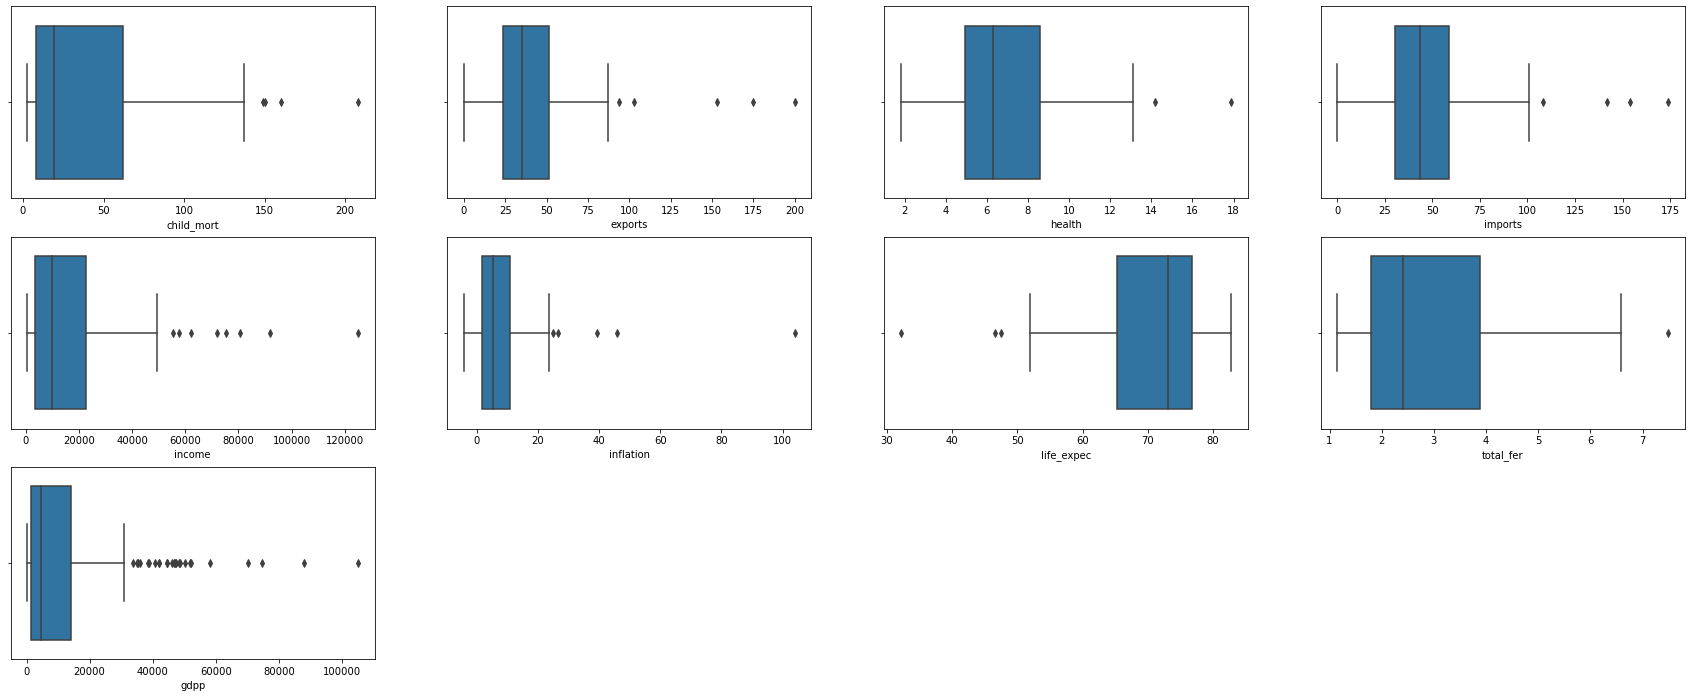

In [12]:
# Plot boxplot 
plt.figure(figsize=(30, 12))

i=1
for c in num_cols:
    plt.subplot(3,4,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


### Conclusion

- There are a number of outliers in the data.

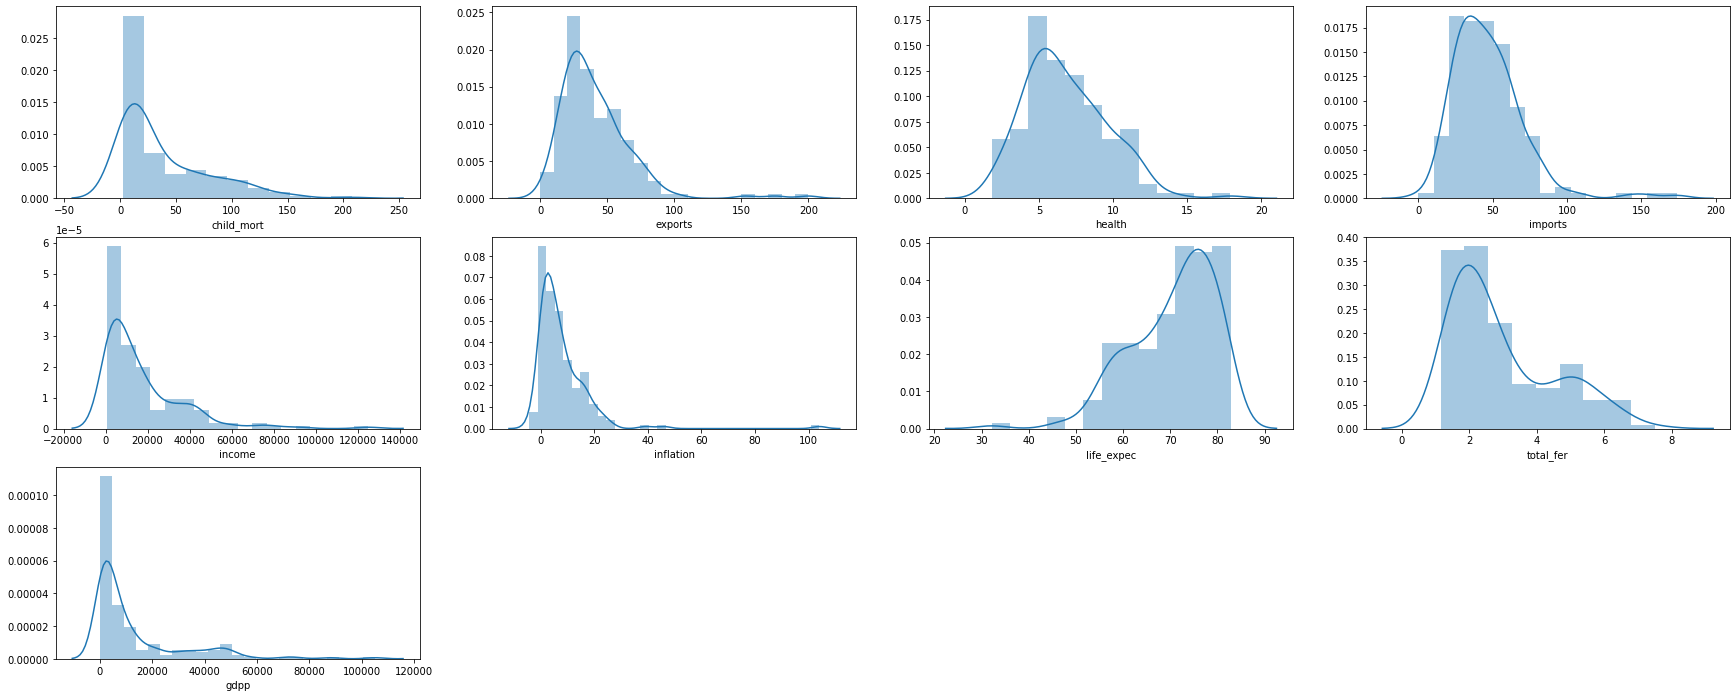

In [13]:
# Plot distplot 
plt.figure(figsize=(30, 12))

i=1
for c in num_cols:
    plt.subplot(3,4,i)
    sns.distplot(data[c])
    i = i + 1
plt.show()

### Conclusion : 

From boxplot, almost all cols have outliers.

We cannot remove outliers, else we will lose info of that country.

We have capped outliers with 0%-95% quartiles values.


### 3. Bivariate Analysis - Categorical Vs Numerical

In [14]:
data.shape

(167, 10)

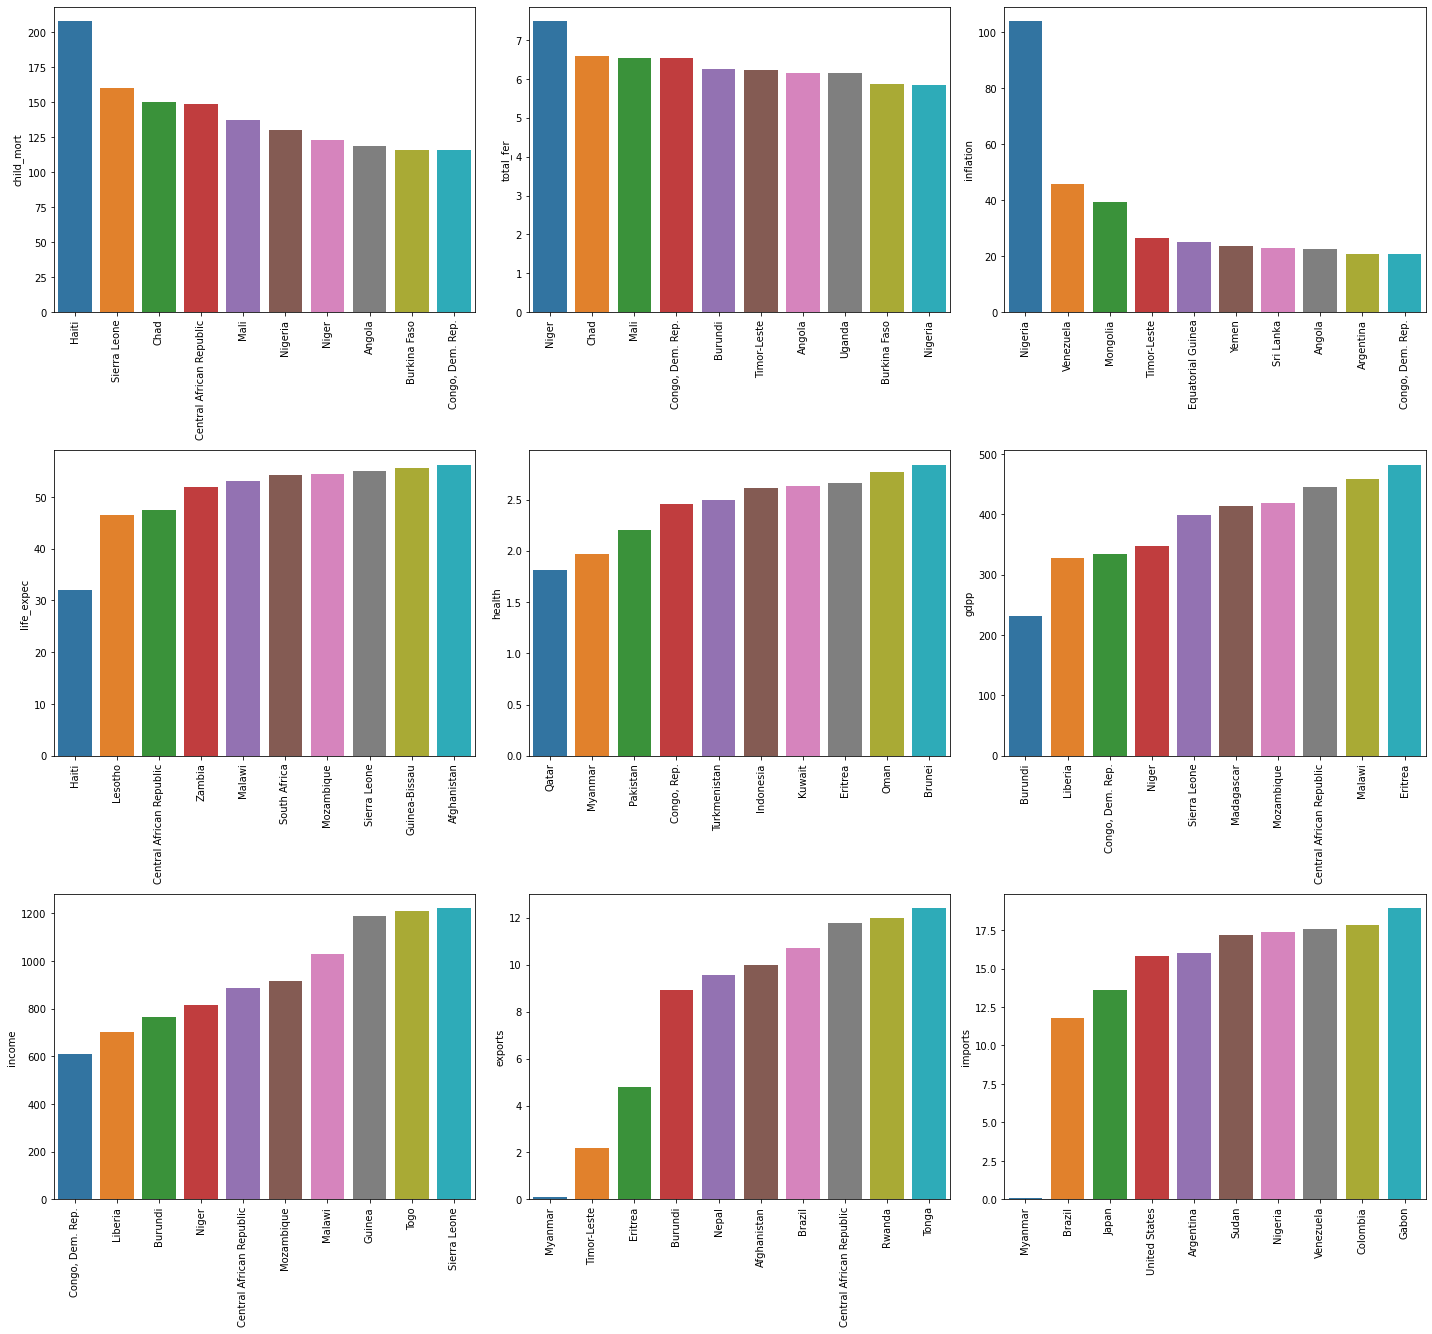

In [15]:

# Find the countries with highest: Child Mortality Rate,Fertility Rate, Inflation
# Find the countries with lowest: Life Expectancy, Health, GDP,Income,Imports,Exports
cols=['child_mort','total_fer','inflation','life_expec','health','gdpp','income','exports','imports']

plt.figure(figsize=(20, 60))
i=1
sortAsc=False
for c in cols:
    ax2 = plt.subplot(10,3,i)
    if(i>3):
        sortAsc = True
    top10_df = data[['country',c]].sort_values(c, ascending = sortAsc).head(10)
    sns.barplot(x='country', y=c, data= top10_df, ax = ax2)
    ax2.set(xlabel=None, ylabel=c)
    plt.xticks(rotation=90)
    i = i + 1

plt.tight_layout()
plt.show()

### 4. Bivariate Analysis - Numerical Vs Numerical

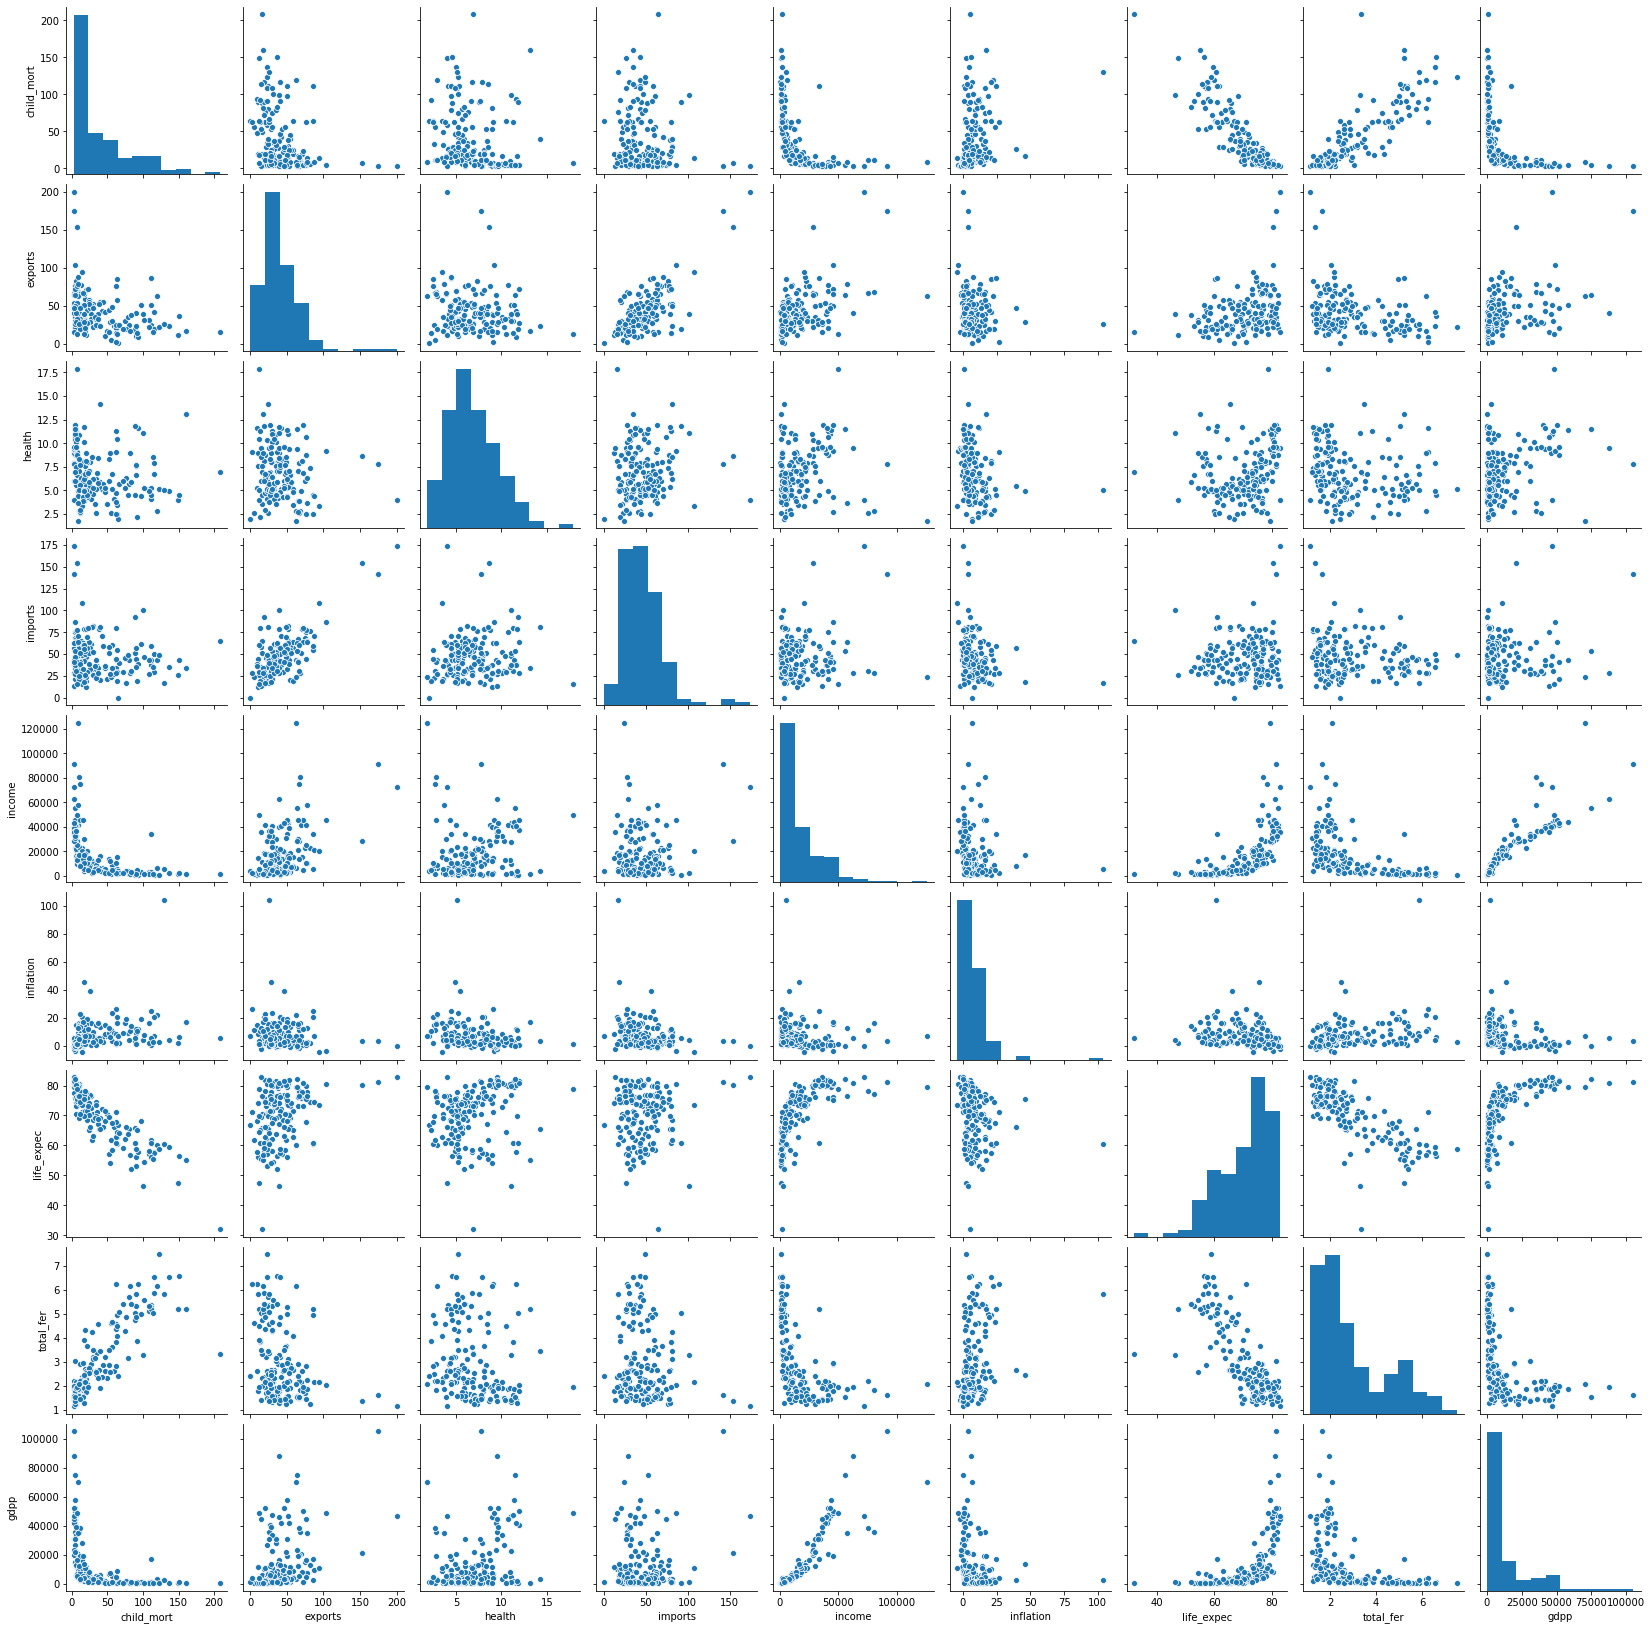

In [16]:
# pairplot of numerical variables
sns.pairplot(data, vars=num_cols)
plt.show()


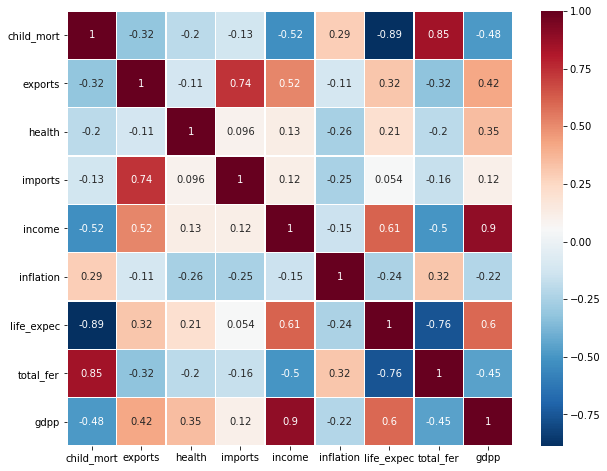

In [17]:
# Heatmap of numerical variables
# find correlation using heatmap
plt.figure(figsize=(10, 8))
pearsoncorr = data[num_cols].corr(method='pearson')
# display(pearsoncorr)
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

### Conclusion:
- From the pairplot and heatmap :
- There is strong positive(dark red color) correlation between : 
    - 1. If child_mort increases total_fer increases
    - 2. If income increases gdpp increases
- There is strong negative correlation(dark blue color) between : 
    - 1. If child_mort increases life_expec decreases
    - 2. If child_mort increases income decreases
- Since correlation exists between the attributes we will have to remove redundant features and select relevant features.

### 5. Multivariate Analysis

##### Conclusion

As there is no target variable for clustering algos, we will perform multivariate analysis based on clusters after identifying clusters

# Handling Outliers

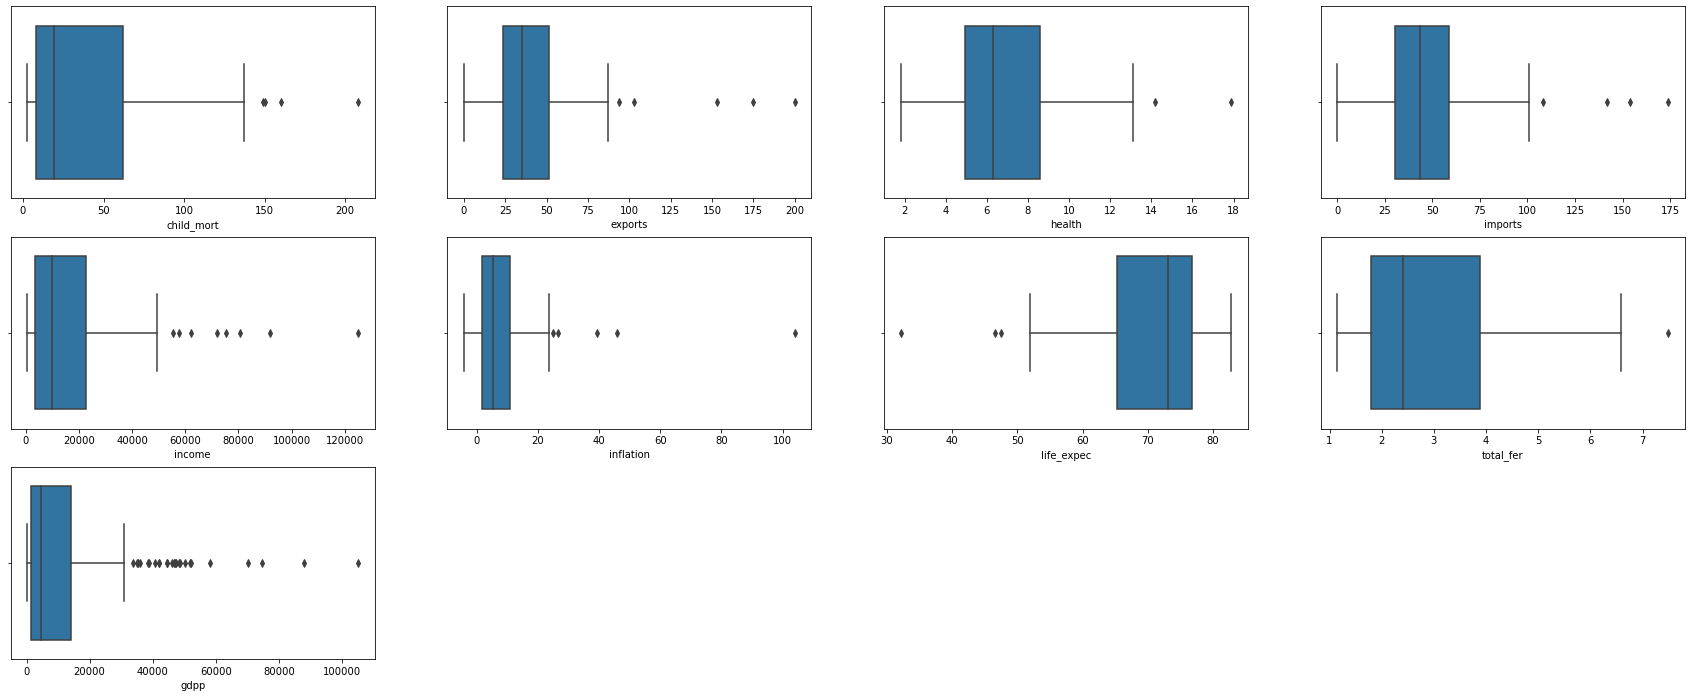

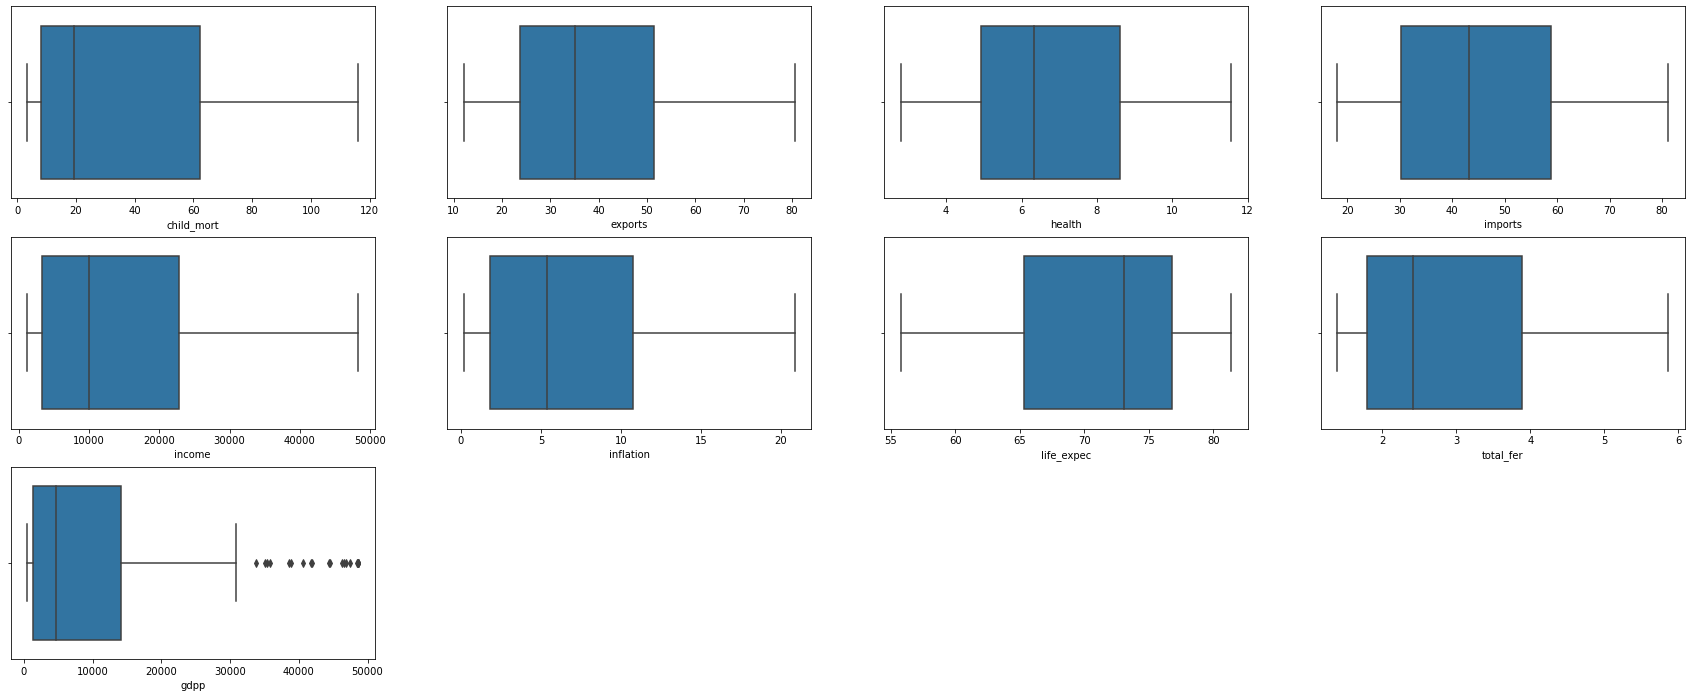

In [18]:
# Plot boxplot 
plt.figure(figsize=(30, 12))

i=1
for c in num_cols:
    plt.subplot(3,4,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()

In [ ]:

# Capping outliers between Q1 and Q3
for c in num_cols:
    Q1=0.05
    Q3=0.95
    percentiles = data[c].quantile([Q1,Q3]).values
#     display(c,"====\n",percentiles)
    data[c][data[c] <= percentiles[0]] = percentiles[0]
    data[c][data[c] >= percentiles[1]] = percentiles[1]
    
data.describe()


In [ ]:

# Plot boxplot 
plt.figure(figsize=(30, 12))

i=1
for c in num_cols:
    plt.subplot(3,4,i)
    sns.boxplot(data[c])
    i = i + 1
plt.show()


### Conclusion

- There are a number of outliers in the data.
- Since our k-means and agglomerative techniques are affected by outliers, we need to remove or cap the outliers. If we had used only DBSCAN method, then it is not affected by outliers and we could have skipped this step. 
- In this case study, we cannot remove the outlier records because we will lose complete information of that country.
- We will cap the outliers to values accordingly for analysis.

# Feature Transformation

### 1. One Hot Encoding - create dummy variables

In [19]:
# # Creating a dummy variable for some of the categorical variables and dropping the first one.
# df_categorical=data.select_dtypes(exclude=[np.int64, np.float64])
# print(df_categorical)
# dummy1 = pd.get_dummies(data[df_categorical], drop_first=True)
# dummy1.head()

# # Adding the results to the master dataframe
# data = pd.concat([data, dummy1], axis=1)
# data.head()

# data = data.drop(df_categorical, axis = 1)

# data.head()

##### Conclusion :
- As there is single alphabetic column which has values like rowindex more than any type , we do not perform one-hot encoding.


- If there had been more categorical cols: 
- We could have converted all categorical values to numerical values as input for many regression APIs requires numerical values. 
- We do this by creating dummy variables. 
- We drop the first value as we can represent that value using other two values. For eg:
            Petrol |  Diesel  | CNG <br/>
Petrolcar = 1 | 0 | 0 <br/>
Dieselcar = 0 | 1 | 0 <br/>
CNGcar    = 0 | 0 | 1<br/>

- Thus we can represent Petrolcar even if we drop Petrol column(feature) as Petrolcar can be still represented as (Diesel,CNG)=(0,0) 

### 1. Label Encoding - Categorical Variables

In [79]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# true_label_names = data['country']
# true_labels = label_encoder.fit_transform(true_label_names)
# display("\n====data.head()===\n",data.head())
# display("\n====true_labels[:5]===\n",true_labels[:5])
# display("\n====label_encoder.classes_===\n",label_encoder.classes_)
# n_clusters = len(label_encoder.classes_)

##### Conclusion:
- Even though country col is non-numerical and contains all the country values for 167 countries.
- The values in country col are more row-index rather than category-labels. 
- Hence not much can be derived by encoding country col. Even then, we have encoded it using LabelEncoder class.
- There are no other cols with categories/types. 
- Since the label_encoder has been fitted to the data, you can see the unique classes represented using .classes_. 
- We can store the length of the array to the variable n_clusters for later use:

### 2. Feature Scaling - Numerical Variables   

In [80]:

display("\n=====Before feature scaling=====\n", data.describe())

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Scale these variables using 'fit_transform'
data[num_cols] = scaler.fit_transform(data[num_cols])
        
display("\n=====After feature scaling=====\n", data.describe())


'\n=====Before feature scaling=====\n'

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.296327,0.397236,0.452947,0.432221,0.308909,0.330295,0.587434,0.342740,0.239652,1.251497
std,0.321609,0.290519,0.288109,0.290486,0.313749,0.303162,0.313787,0.321687,0.314773,1.068264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042563,0.170636,0.242511,0.191557,0.045500,0.078631,0.371585,0.090584,0.017948,0.000000
50%,0.140750,0.334259,0.401982,0.399460,0.185802,0.251689,0.676034,0.228137,0.087116,1.000000
75%,0.521059,0.573119,0.661693,0.644660,0.458547,0.510794,0.820453,0.556922,0.282155,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


'\n=====After feature scaling=====\n'

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.296327,0.397236,0.452947,0.432221,0.308909,0.330295,0.587434,0.342740,0.239652,1.251497
std,0.321609,0.290519,0.288109,0.290486,0.313749,0.303162,0.313787,0.321687,0.314773,1.068264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042563,0.170636,0.242511,0.191557,0.045500,0.078631,0.371585,0.090584,0.017948,0.000000
50%,0.140750,0.334259,0.401982,0.399460,0.185802,0.251689,0.676034,0.228137,0.087116,1.000000
75%,0.521059,0.573119,0.661693,0.644660,0.458547,0.510794,0.820453,0.556922,0.282155,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


##### Conclusion:

- There is lot of variation in the mean values of the columns.
- This may be because data in each col is measured in different units of measurement.
- For eg means before scaling were:
    - total_fer = 2.947964
    - health=6.815689
    - inflation=7.781832
    - child_mort =38.270060
    - exports=41.108976
    - imports =46.890215 
    - life_expec=70.555689 
    - income=17144.688623
    - gdpp= 12964.155689
- However most ML algorithms would consider income more important than child_mort only because the values for income are larger and have higher variability from country to country. Hence Feature Scaling is required so that all the cols are brought down in same range so that they can be compared with each other.
- This is because the ML algorithms internally use SVD to compute the principal components and assume that the data is scaled and centred.
- There are two common ways of rescaling:
    - Min-Max scaling(Normalization)
    - Standardisation (mean-0, sigma-1)    
- Note : 
    - Since we have normalized our data, we could have used StandardScaler class for this which implements standardization method to scale the numerical features. Standardization scales/shifts the values so that the features have a mean of 0 and standard deviation of 1. 
    - However we have used MinMaxScaler because we do not want to assume that the shape of all the features follows a normal distribution. 
- We can clearly see mean,min,max,25%,50%,75% values have been normalized in comparable range.   


### 3. Identify feature and response variables


In [22]:
print(data.shape)

# Putting feature variable to X
X = data[num_cols]

# Putting response variable to y
y = data['country']

# display(X.head())
# display(y.head())

(167, 10)


##### Conclusion:
After label encoding and scaling, we can now Identify feature and response variables

### 4. Feature Selection/Reduction 

##### Method 1- Identify important features


[0.11942107 0.11455673 0.12987334 0.11471341 0.11309941 0.11404402
 0.09597522 0.11417051 0.08414629]


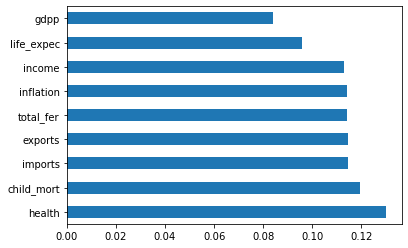

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,data.index)
print(model.feature_importances_)

#top 15 important features 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

##### Method 2 - Feature Selection using Information Gain


In [24]:

# from sklearn.feature_selection import mutual_info_classif
# mutual_info=mutual_info_classif(X,y)
# mutual_data=pd.Series(mutual_info,index=X.columns)
# mutual_data.sort_values(ascending=False)

In [25]:
# ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

##### Method 2-  Verify if feature reduction is needed - identify features that have a correlation higher than 0.8


[]


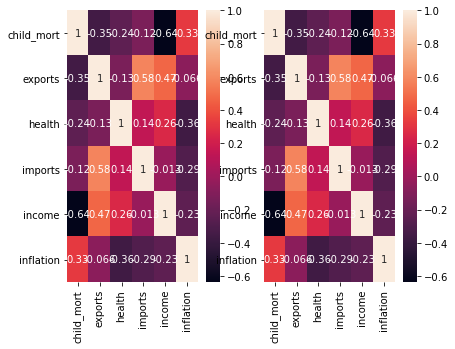

In [82]:
# Find the highly correlated pairs using the correlation matrix
corr = X.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
is_corr_exists = False
correlated_features=set({})
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.8:
            if columns[j]:
                is_corr_exists = True
                columns[j] = False
                print(corr.columns[i],',',corr.columns[j],'=',corr.iloc[i,j])
                colname = corr.columns[j]
                correlated_features.add(colname)

correlated_features = list(correlated_features)
len(correlated_features)
print(correlated_features)

         
# Check if any high correlated features
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(corr,annot = True)


#Drop the correlated cols
X.drop(labels=correlated_features, axis=1, inplace=True)


# Confirm that there is little to no correlation between the selected variables.
corr = X.corr()
# plt.figure(figsize = (10,5))
plt.subplot(1,2,2)

sns.heatmap(corr,annot = True)


##### Conclusion:
- As the number of features increases, the feature space becomes sparse.
- This sparsity makes it difficult for ML algorithms to find data objects near one another in higher-dimensional space.
- Feature Reduction reduces the number of features in the dataset by either removing or combining them.
- From correlation matrix and heatmap we can see many features have strong positive/negative correlation:
    - child_mort , life_expec = -0.8902009688632465
    - child_mort , total_fer = 0.892782059760353
    - income , gdpp = 0.9415138703300449
    
- We have identified the redundant column-pairs using correlation matrix.
- We may think of removing any one of the column and retaining the other from the pair
- We see about 3 columns of the original features in the dataset. 
- From correlation matrix and heatmap we can see now no of features is reduced from 9 to 5
- None of the features have positive/negative correlation with each other.

In [27]:
### Method 3 - p-value

##### Conclusion : 
# Feature Selection
- Method - 1 : Feature Selection using Correlation
- Method 2 - Feature Selection using Information Gain
- Method 3 - Feature Selection using  RFE
     - The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

     - 1. Checking VIF : 
    - Variance Inflation Factor or VIF, shows how much the feature variables are correlated with each other. 
    - The formula for calculating VIF is:VIFi=1/(1−Ri2)
    - If a VIF is > 10, model have high multicollinearity.
    - High multicollinearity between two variables indicates either of the features cannot be included in the model.
    - We can also lookup heatplot and pairplot and remove columns with very high VIF, as it is insignificant.


     - 2. Checking the p-value

   - Assumption:
H0 = Selected combination of dependent variables do not have any effect on the independent variables

    - The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis.
    - The regression output  predictor variables are statistically significant because their p-values equal 0.000. 
    - On the other hand, feature is not statistically significant because its p-value > 0.05.
    - Keeping variables that are not statistically significant can reduce the model’s precision.
    - Hence we can remove such features which have p-value > 0.05.


3. Check effect of feature on p-value todrop columns
    - Build regression model using variables    
    - Calculate the p values for these variables, a high p-value( p-value > 0.05) indicates that the feature is insignificant. Insignificant features may cause bias in the model, hence should be discarded.
    - Also verify that the VIF is within range(VIF> 10) indicates that the feature has high multicollinearity with other variables
    - If the p values is higher than 0.05 threshhold or VIF is higher than 10, we discard that combination of features,  and rebuild the model.


4. Steps:

All columns have VIF < 10 since we have removed the highly correlated values using the heatmap. 
So we have to only check for high p-values (p-value > 0.05) 


#### What is meaning of p-value : 
https://www.simplypsychology.org/p-value.html


# Split Train/Test = 70%/30%


In [28]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Hopkins test to confirm if data can be clustered

In [83]:
# Calculating Hopkins score to know whether the data is good for clustering or not.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkin_score(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

hopkin_score(data[num_cols])

0.7389389051720754

### Conclusion:

The Hopkins statisticgives a value which measures the cluster tendency, 
in other words: how well the data can be clustered.
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

0.73 is good score, so dataset has good tendency to cluster.

# Model Building

In [84]:
data_backup = data.copy()

In [31]:
# data = data_backup.copy()

### 1.   K- means Clustering

##### 1. Finding the Optimal Number of Clusters

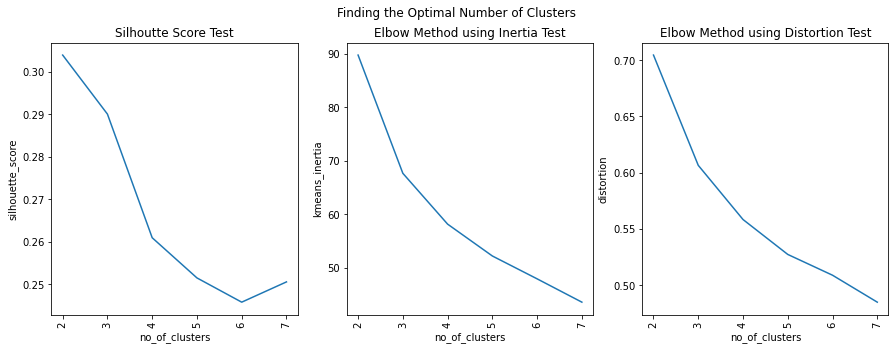

In [85]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

ss = []
inertias = []
distortions=[]
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, max_iter=50,random_state= 0)
    kmeans.fit(data[num_cols])
    kmeans_cluster_labels= kmeans.labels_
    
    silhouette_avg_score = silhouette_score(data[num_cols],kmeans_cluster_labels )
    distortion_score = sum(np.min(cdist(data[num_cols], kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    kmeans_inertia_score=kmeans.inertia_
    
    ss.append([k, silhouette_avg_score])   
    distortions.append([k,distortion_score])
    inertias.append([k,kmeans_inertia_score])
    
                       
silhouette_df = pd.DataFrame(ss,columns=['no_of_clusters','silhouette_score'])    
silhouette_df=silhouette_df.sort_values(by='silhouette_score',ascending=False)
elbow_inertia_df = pd.DataFrame(inertias,columns=['no_of_clusters','kmeans_inertia'])
elbow_distortion_df = pd.DataFrame(distortions,columns=['no_of_clusters','distortion'])

# display(elbow_distortion_df)
# display(elbow_inertia_df)
# display(silhouette_df)

titles=['Silhoutte Score Test','Elbow Method using Inertia Test','Elbow Method using Distortion Test']
l=[silhouette_df,elbow_inertia_df,elbow_distortion_df]
plt.figure(figsize=(15, 5))
i=1
for df in l:
    ax2 = plt.subplot(1,3,i)
    sns.lineplot(x=df.columns[0],  y = df.columns[1], data = df,ax=ax2)
    plt.xticks(rotation=90)
    plt.title(titles[i-1])
    i = i + 1

plt.suptitle('Finding the Optimal Number of Clusters')
plt.show()

In [86]:
# Identify the elbow point programmatically:
# pip install kneed or conda install kneed
ss = list(silhouette_df.silhouette_score)
from kneed import KneeLocator
kl = KneeLocator(range(2, 8), ss, curve="convex", direction="decreasing")
print("Programmatically Optimum no of clusters = ",kl.elbow)

Programmatically Optimum no of clusters =  4


##### Conclusion:

For any unsupervised algorithm we have to determine the optimal number of clusters into which the data may be clustered. 
There are many ways to do that. 
These are often used as complementary evaluation techniques rather than one being preferred over the other. 

1.   SSE 
    - When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k.
    - As more centroids are added, the distance from each point to its closest centroid will decrease.
    - There’s a sweet spot where the SSE curve starts to bend known as the elbow point. 
    - The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. 
    - To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE
    - In this example, the elbow is located at x=3 or 4:

2. Elbow Curve to get the right number of Clusters
    - One of the most popular methods 
    - Two types :   
        - Distortion:
        It is calculated as the average of the squared distances
        from the cluster centers of the respective clusters. 
        Typically, the Euclidean distance metric is used.
        - Inertia:
        It is the sum of squared distances of samples to their closest cluster center.
        Inertia is the sum of squared error for each cluster. 
        Therefore the smaller the inertia the denser the cluster(closer together all the points are) 
        
    - To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3 or 4.

3. Silhouette Analysis
    - Formula: <br/>
    silhouette score=(p−q)/max(p,q)<br/>
    where,<br/>
    p = is the mean distance to the points in the nearest cluster that the data point is not a part of<br/>
    q = is the mean intra-cluster distance to all the points in its own cluster.<br/>
    - A higher silhouette coefficient suggests better clusters
    - The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
       - How close the data point is to other points in the cluster
       - How far away the data point is from points in other clusters
    - Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. The value of the silhouette score range lies between -1 to 1.
        - A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
        - A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

    - In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score.
    - The silhouette score() function needs a minimum of two clusters, or it will raise an exception.
    - A list holds the silhouette coefficients for each k
    - Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score:

4. Use kneed to identify the elbow point programmatically. The value is 4.

##### 2. Apply K-means with the identified no of k=4 clusters


In [87]:
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(data[num_cols])

# Assign the label
data['Cluster_Id'] = kmeans.labels_
data.head()

# Number of countries in each cluster
print(data['Cluster_Id'].value_counts())


2    52
3    45
0    36
1    34
Name: Cluster_Id, dtype: int64


##### 3. Cluster Profiling of k-means

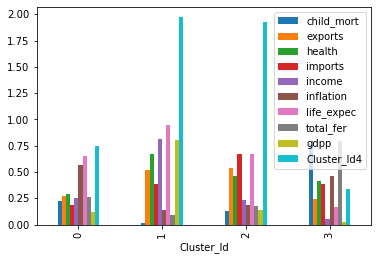

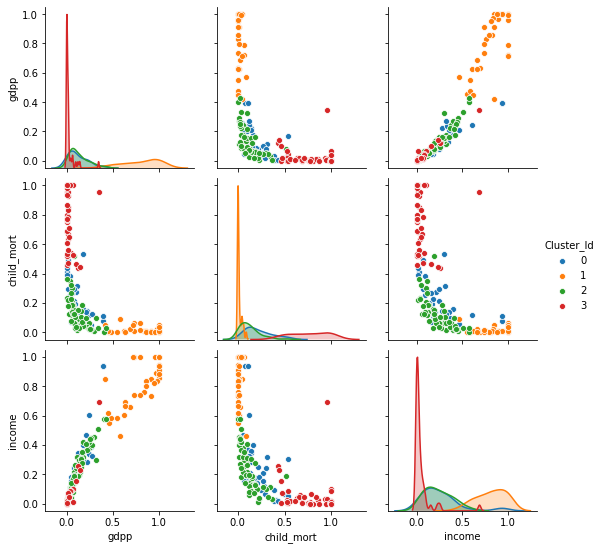

In [92]:

# Making sense out of the clusters
data_df=data.drop('country', axis = 1).groupby('Cluster_Id').mean()
data_df.plot(kind = 'bar')

lst=['gdpp', 'child_mort', 'income']
sns.pairplot(data, vars=lst, hue = 'Cluster_Id')
plt.show()


##### Conclusion:
There is a fair distribution of the clusters with:
    
- 2=52%
- 3=45%
- 0=36%
- 1=34%

### 2. Hierarchical clustering(both single and complete linkage)
Since we know optimum no of clusters is 4, we select n_clusters = 4

##### 1. Hierarchical clustering - complete linkage

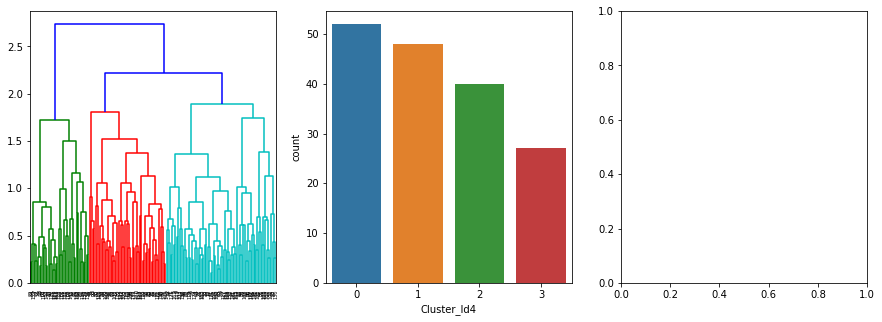

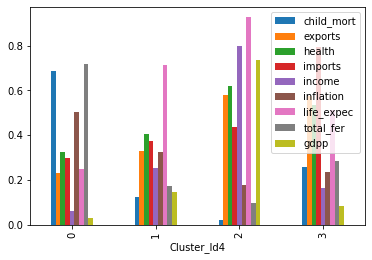

<Figure size 1080x360 with 0 Axes>

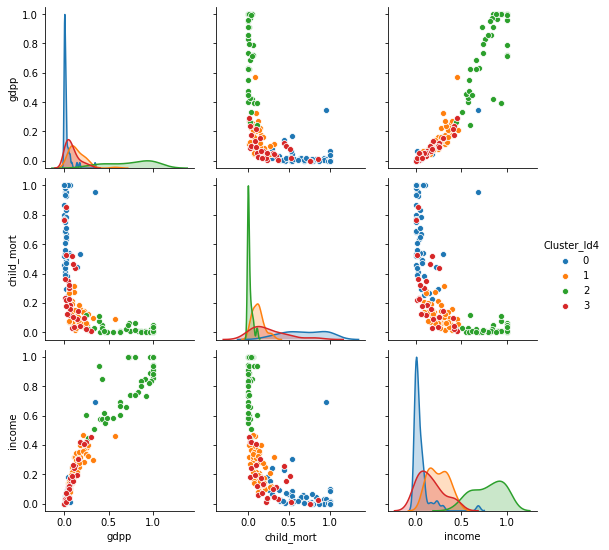

In [93]:
data = data_backup.copy()
mergings_complete = linkage(data[num_cols], method = "complete", metric='euclidean')


# Number of countries in each cluster
clusterCut4 = pd.Series(cut_tree(mergings_complete, n_clusters = 4).reshape(-1,))

# Assign the label
data['Cluster_Id4']=clusterCut4


plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
dendrogram(mergings_complete)

plt.subplot(1,3,2)
sns.countplot(data['Cluster_Id4'])

plt.subplot(1,3,3)
data.drop('country', axis = 1).groupby('Cluster_Id4').mean().plot(kind = 'bar')
plt.show()


plt.figure(figsize=(15, 5))
lst=['gdpp', 'child_mort', 'income']
sns.pairplot(data, vars=lst, hue = 'Cluster_Id4')
plt.show()

##### 2. Hierarchical clustering - single linkage

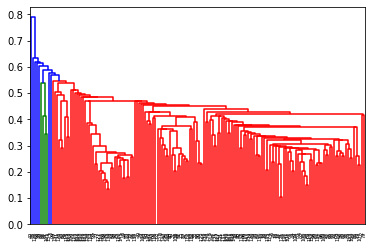

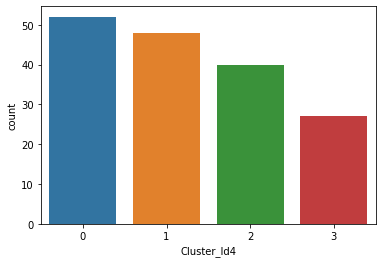

<Figure size 1080x360 with 0 Axes>

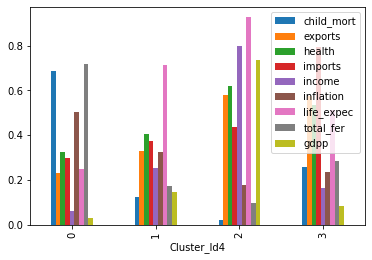

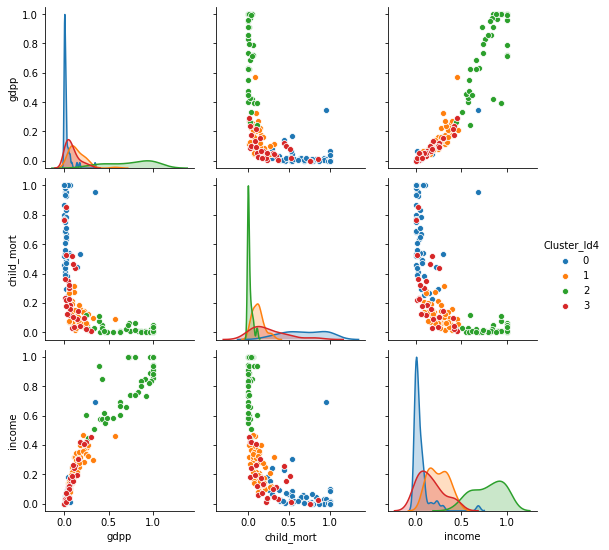

In [65]:
# Single linkage
data = data_backup.copy()
mergings_single = linkage(data[num_cols], method='single',metric='euclidean')
dendrogram(mergings_single)
plt.show()

# Number of countries in each cluster
clusterCut4 = pd.Series(cut_tree(mergings_complete, n_clusters = 4).reshape(-1,))

# Assign the label
data['Cluster_Id4']=clusterCut4
sns.countplot(data['Cluster_Id4'])
plt.show()


# pairplot of numerical variables
plt.figure(figsize=(15, 5))
lst=['gdpp', 'child_mort', 'income']
data.drop('country', axis = 1).groupby('Cluster_Id4').mean().plot(kind = 'bar')
sns.pairplot(data, vars=lst, hue = 'Cluster_Id4')
plt.show()


##### Conclusion:
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. 
For example, all files and folders on the hard disk are organized in a hierarchy. 
There are two types of hierarchical clustering,

    Divisive
    Agglomerative.


Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters
is defined as the shortest distance between two points in each cluster.
For example, the distance between clusters
“r” and “s” to the left is equal to the length of the arrow between their two closest points. 

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is 
defined as the longest distance between two points in each cluster. 
For example, the distance between clusters “r” and “s” to the left is 
equal to the length of the arrow between their two furthest points. 


Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.



We have analyzed both K-means and Hierarchial clustering and
found clusters formed are not identical. The clusters formed in
both the cases are not that great but its better in K-means as compared
to Hierarchial. So, we will proceed with the clusters formed by K-means 
and based on the information provided by the final clusters we will deduce
the final list of countries which are in need of aid.


# Final Analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,0.255968,0.574520,0.533149,0.793813,0.164413,0.236083,0.512794,0.285544,0.085017,3.0
std,0.221473,0.281422,0.316654,0.193329,0.140493,0.153261,0.266287,0.212671,0.076398,0.0
min,0.009241,0.017239,0.000000,0.418505,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.099431,0.397078,0.287504,0.666085,0.041039,0.117061,0.326698,0.121897,0.022726,3.0
50%,0.183401,0.543170,0.461214,0.807332,0.130361,0.191747,0.543326,0.281816,0.066137,3.0
75%,0.356229,0.820015,0.849641,0.982701,0.250377,0.331451,0.734582,0.445091,0.112456,3.0
max,0.855163,1.000000,1.000000,1.000000,0.456422,0.576054,0.863388,0.811899,0.293579,3.0


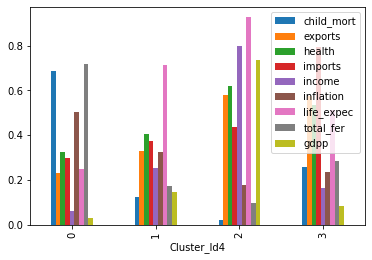

In [70]:
# fig, axs = plt.subplots(3,3,figsize = (15,15))
# data.drop('country', axis = 1).groupby('Cluster_Id3').mean().plot(kind = 'bar')
# sns.barplot(x=data.Cluster_Id3, y=data[num_cols])
data.drop('country', axis = 1).groupby('Cluster_Id4').mean().plot(kind = 'bar')


In [77]:
# get the cluster of concern
cols=['gdpp','income','child_mort']
sort_order=[True,True,False]
data_df = data.sort_values(cols, ascending=sort_order)
display(data_df.head(10))

display(data[data.Cluster_Id4 == 0].describe())
display(data[data.Cluster_Id4 == 3].describe())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
31,Central African Republic,1.000000,0.000000,0.135437,0.132836,0.000000,0.088299,0.000000,0.854395,0.000000,0
37,"Congo, Dem. Rep.",1.000000,0.423375,0.583096,0.499445,0.000000,0.996616,0.067135,1.000000,0.000000,0
112,Niger,1.000000,0.147261,0.269849,0.491509,0.000000,0.114403,0.117877,1.000000,0.000000,0
106,Mozambique,0.866714,0.283126,0.275544,0.445485,0.000000,0.360456,0.000000,0.932677,0.000000,0
26,Burundi,0.800960,0.000000,1.000000,0.334391,0.000000,0.585722,0.074941,1.000000,0.000000,0
94,Malawi,0.773414,0.156026,0.432737,0.266148,0.000000,0.576054,0.000000,0.876761,0.000000,0
88,Liberia,0.762751,0.101972,1.000000,1.000000,0.000000,0.255557,0.195941,0.811899,0.000000,3
132,Sierra Leone,1.000000,0.068371,1.000000,0.259800,0.000149,0.822590,0.000000,0.852158,0.000000,0
93,Madagascar,0.521948,0.188167,0.111516,0.394699,0.003760,0.416047,0.195941,0.717960,0.000000,0
50,Eritrea,0.459748,0.000000,0.000000,0.082050,0.004397,0.551884,0.231069,0.720197,0.000334,0


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,0.688692,0.230646,0.325609,0.296971,0.059697,0.502349,0.248289,0.719160,0.027123,0.0
std,0.246901,0.236297,0.250215,0.192335,0.111073,0.313736,0.201043,0.259404,0.056179,0.0
min,0.227830,0.000000,0.000000,0.000000,0.000000,0.033916,0.000000,0.210244,0.000000,0.0
25%,0.514395,0.062162,0.175589,0.151881,0.004344,0.239363,0.065183,0.531201,0.002012,0.0
50%,0.685889,0.163331,0.270988,0.267735,0.019797,0.442876,0.215457,0.799597,0.009681,0.0
75%,0.955571,0.333528,0.437009,0.408189,0.065839,0.789961,0.415496,0.910870,0.020752,0.0
max,1.000000,1.000000,1.000000,0.739089,0.690082,1.000000,0.617486,1.000000,0.345507,0.0


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,0.255968,0.574520,0.533149,0.793813,0.164413,0.236083,0.512794,0.285544,0.085017,3.0
std,0.221473,0.281422,0.316654,0.193329,0.140493,0.153261,0.266287,0.212671,0.076398,0.0
min,0.009241,0.017239,0.000000,0.418505,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.099431,0.397078,0.287504,0.666085,0.041039,0.117061,0.326698,0.121897,0.022726,3.0
50%,0.183401,0.543170,0.461214,0.807332,0.130361,0.191747,0.543326,0.281816,0.066137,3.0
75%,0.356229,0.820015,0.849641,0.982701,0.250377,0.331451,0.734582,0.445091,0.112456,3.0
max,0.855163,1.000000,1.000000,1.000000,0.456422,0.576054,0.863388,0.811899,0.293579,3.0


In [78]:
## top 10 poor countries which need financial aid from selected cluster of concern are : 

data_df = data[data['Cluster_Id4']==0]
cols=['gdpp','income','child_mort']
sort_order=[True,True,False]
data_df = data_df.sort_values(cols, ascending=sort_order)
data_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id4
31,Central African Republic,1.000000,0.000000,0.135437,0.132836,0.000000,0.088299,0.000000,0.854395,0.000000,0
37,"Congo, Dem. Rep.",1.000000,0.423375,0.583096,0.499445,0.000000,0.996616,0.067135,1.000000,0.000000,0
112,Niger,1.000000,0.147261,0.269849,0.491509,0.000000,0.114403,0.117877,1.000000,0.000000,0
106,Mozambique,0.866714,0.283126,0.275544,0.445485,0.000000,0.360456,0.000000,0.932677,0.000000,0
26,Burundi,0.800960,0.000000,1.000000,0.334391,0.000000,0.585722,0.074941,1.000000,0.000000,0
94,Malawi,0.773414,0.156026,0.432737,0.266148,0.000000,0.576054,0.000000,0.876761,0.000000,0
132,Sierra Leone,1.000000,0.068371,1.000000,0.259800,0.000149,0.822590,0.000000,0.852158,0.000000,0
93,Madagascar,0.521948,0.188167,0.111516,0.394699,0.003760,0.416047,0.195941,0.717960,0.000000,0
50,Eritrea,0.459748,0.000000,0.000000,0.082050,0.004397,0.551884,0.231069,0.720197,0.000334,0
150,Togo,0.771637,0.410226,0.553480,0.621647,0.000000,0.048176,0.113973,0.778349,0.000459,0


##### Conclusion:

We got Cluster 0 and Cluster 3 which are in need of aid.

cluster 0 is our cluster of concern than cluster 3. Because it has:
- highest mean child mortality(c0=0.688692, c3=0.255968)
- Lowest mean income(c0=0.059697,c3=0.164413)
- Lowest mean gdpp(c0=0.027123,c3=0.085017)


